In [1]:
#obtaining rough insitu vs exsitu bar graphs, and subhaloid of formations for counterrottating particles
#Single subhalo

import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import illustris_python as il

def hdf5_to_dict(file_path):
    data_dict = {}
    
    with h5py.File(file_path, 'r') as hdf_file:
        # Recursively traverse the HDF5 file and populate the dictionary
        def traverse(name, obj):
            if isinstance(obj, h5py.Dataset):
                data_dict[name] = obj[()]  # Store dataset value in dictionary
            elif isinstance(obj, h5py.Group):
                # Create a nested dictionary for groups
                group_dict = {}
                data_dict[name] = group_dict
                
                # Recursively visit the group's children
                obj.visititems(traverse)
        
        hdf_file.visititems(traverse)
    
    return data_dict


In [2]:
file_path = '/u/mcastillo/home/data/unique_ids_099.hdf5'
data = hdf5_to_dict(file_path)

dataset = data['LeafSubhaloID']


In [3]:
data['LeafSubhaloID'],data

(array([              600373,               600345,               600345,
        ..., 18446744073709551615, 18446744073709551615,
        18446744073709551615], dtype=uint64),
 {'LeafSubhaloID': array([              600373,               600345,               600345,
         ..., 18446744073709551615, 18446744073709551615,
         18446744073709551615], dtype=uint64)})

In [4]:
file_path = '/virgotng/universe/IllustrisTNG/L35n2160TNG/postprocessing/StellarAssembly/stars_099.hdf5'
data = hdf5_to_dict(file_path)


In [5]:
data

{'AccretionOrigin': array([ 0,  0,  0, ..., -1, -1, -1], dtype=int8),
 'AfterInfall': array([ 1,  1,  1, ..., -1, -1, -1], dtype=int8),
 'DistanceAtFormation': array([ 0.34050775,  0.325681  ,  0.17944826, ..., -1.        ,
        -1.        , -1.        ], dtype=float32),
 'InSitu': array([ 0,  0,  0, ..., -1, -1, -1], dtype=int8),
 'MergerMassRatio': array([ 0.24064991,  0.24064991,  0.24064991, ..., -1.        ,
        -1.        , -1.        ], dtype=float32),
 'ParticleID': array([146390141809, 148377919050, 147257453292, ..., 153690397674,
        153714199007, 153715459465], dtype=uint64),
 'SnapNumAtFormation': array([71, 77, 73, ..., 98, 98, 98], dtype=int16),
 'SubfindID': array([ 0,  0,  0, ..., -1, -1, -1], dtype=int32),
 'SubfindIDAtFormation': array([43, 14, 23, ..., -1, -1, -1], dtype=int32)}

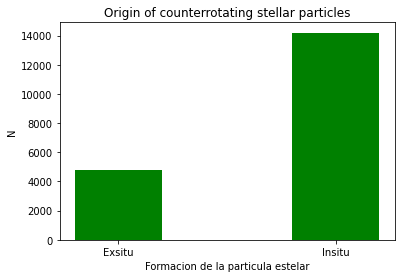

In [9]:
SubhaloID = 547844
data_contrarotante = data.copy()
#Filtremos primero por el subhalo de interes
filtro_subhalo = np.isin(data_contrarotante['SubfindID'],SubhaloID)
data_contrarotante['ParticleID'] = data_contrarotante['ParticleID'][filtro_subhalo]
data_contrarotante['AccretionOrigin'] = data_contrarotante['AccretionOrigin'][filtro_subhalo]
data_contrarotante['DistanceAtFormation'] = data_contrarotante['DistanceAtFormation'][filtro_subhalo]
data_contrarotante['InSitu'] = data_contrarotante['InSitu'][filtro_subhalo]
data_contrarotante['MergerMassRatio'] = data_contrarotante['MergerMassRatio'][filtro_subhalo]
data_contrarotante['SnapNumAtFormation'] = data_contrarotante['SnapNumAtFormation'][filtro_subhalo]
data_contrarotante['SubfindID'] = data_contrarotante['SubfindID'][filtro_subhalo]
data_contrarotante['SubfindIDAtFormation'] = data_contrarotante['SubfindIDAtFormation'][filtro_subhalo]
#y filtremos ahora por las ids de las contrarotantes
filename = 'tables/subhalo'
filename += str(SubhaloID)
filename += '.0_counterrotating.csv'

subhalo_df = pd.read_csv(filename)

filtro_contrarotante = np.isin(data_contrarotante['ParticleID'],subhalo_df['ParticleIDs'])
data_contrarotante['ParticleID'] = data_contrarotante['ParticleID'][filtro_contrarotante]
data_contrarotante['AccretionOrigin'] = data_contrarotante['AccretionOrigin'][filtro_contrarotante]
data_contrarotante['DistanceAtFormation'] = data_contrarotante['DistanceAtFormation'][filtro_contrarotante]
data_contrarotante['InSitu'] = data_contrarotante['InSitu'][filtro_contrarotante]
data_contrarotante['MergerMassRatio'] = data_contrarotante['MergerMassRatio'][filtro_contrarotante]
data_contrarotante['SnapNumAtFormation'] = data_contrarotante['SnapNumAtFormation'][filtro_contrarotante]
data_contrarotante['SubfindID'] = data_contrarotante['SubfindID'][filtro_contrarotante]
data_contrarotante['SubfindIDAtFormation'] = data_contrarotante['SubfindIDAtFormation'][filtro_contrarotante]

insitu_info = data_contrarotante['InSitu']

labels = ['Exsitu','Insitu']

# Calculate the histogram
hist, bins = np.histogram(insitu_info, bins=[0, 0.5, 1])

# Plot the histogram
plt.bar(labels, hist, width=0.4,color='green')
plt.xlabel('Formacion de la particula estelar')
plt.ylabel('N')
plt.title('Origin of counterrotating stellar particles')
plt.savefig('insitu%s'%SubhaloID)


In [ ]:
data_contrarotante['SubfindIDAtFormation'][np.where(data_contrarotante['InSitu'] == 1)]

array([141651, 141651, 244601, ..., 191845, 253962, 175661], dtype=int32)

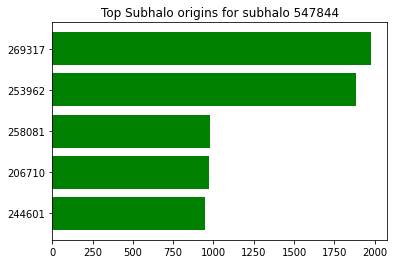

In [8]:
subhalos_origen = data_contrarotante['SubfindIDAtFormation']
subhalos_origen = subhalos_origen.astype(str)

unicos_subhalos, cuentas = np.unique(subhalos_origen, return_counts=True)

indices_ordenados = np.argsort(-cuentas)
subhalos_orden = unicos_subhalos[indices_ordenados]
cuentas_orden = cuentas[indices_ordenados]

top5_subhalos = subhalos_orden[:5]
top5_cuentas = cuentas_orden[:5]

plt.barh(top5_subhalos,top5_cuentas,color='green')
plt.gca().invert_yaxis()
plt.title('Top Subhalo origins for subhalo %s'%SubhaloID)
plt.savefig('origins%s'%SubhaloID)

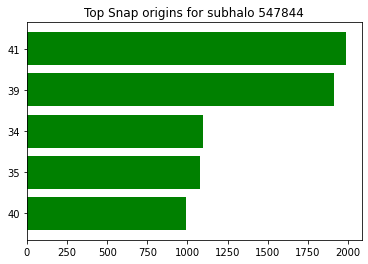

In [10]:
subhalos_origen = data_contrarotante['SnapNumAtFormation']
subhalos_origen = subhalos_origen.astype(str)

unicos_subhalos, cuentas = np.unique(simport h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import illustris_python as ilubhalos_origen, return_counts=True)

indices_ordenados = np.argsort(-cuentas)
subhalos_orden = unicos_subhalos[indices_ordenados]
cuentas_orden = cuentas[indices_ordenados]

top5_subhalos = subhalos_orden[:5]
top5_cuentas = cuentas_orden[:5]

plt.barh(top5_subhalos,top5_cuentas,color='green')
plt.gca().invert_yaxis()
plt.title('Top Snap origins for subhalo %s'%SubhaloID)
plt.savefig('timeorigins%s'%SubhaloID)

In [ ]:
len(data_contrarotante['SubfindIDAtFormation'])

19003

In [ ]:
a = 'lmao'
print('%s'%a)

lmao
